In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%qtconsole

In [3]:
huamn_ORBI = pd.read_csv('../../data/human-ORBI/raw/protein/protein.csv')

In [4]:
huamn_ORBI

,ID,protein probability,mRNA(M),label
0,ENSP00000365463,0.0,42.797037,0
1,ENSP00000340887,0.0,43.766345,0
2,ENSP00000315203,0.0,44.103584,0
3,ENSP00000295067,0.0,44.599759,1
4,ENSP00000371640,0.0,44.763595,0
...,...,...,...,...
9779,ENSP00000224237,1.0,33098.770350,1
9780,ENSP00000367258,0.0,34589.055520,1
9781,ENSP00000366385,0.0,35962.358030,0
9782,ENSP00000306306,0.0,40889.590660,1


In [5]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(huamn_ORBI['label'], huamn_ORBI['protein probability'])
roc_auc

0.6359470184779541

In [5]:
ids = '\r'.join(huamn_ORBI.ID.to_list())

In [6]:
import requests ## python -m pip install requests

string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv-no-header"
method = "get_string_ids"

## Set parameters
params = {

    "identifiers" : ids, # your protein list
    "species" : 9606, # species NCBI identifier 
    "limit" : 1, # only one (best) identifier per input protein
    "echo_query" : 1, # see your input identifiers in the output
    "caller_identity" : "Grape-Pi" # your app name

}

## Construct URL
request_url = "/".join([string_api_url, output_format, method])

## Call STRING
results = requests.post(request_url, data=params)

## Read and parse the results
for line in results.text.strip().split("\n"):
    l = line.split("\t")
    input_identifier, string_identifier = l[0], l[2]
    print("Input:", input_identifier, "STRING:", string_identifier, sep="\t")

Input:	ENSP00000365463	STRING:	9606.ENSP00000365462
Input:	ENSP00000340887	STRING:	9606.ENSP00000340887
Input:	ENSP00000315203	STRING:	9606.ENSP00000315203
Input:	ENSP00000295067	STRING:	9606.ENSP00000396103
Input:	ENSP00000371640	STRING:	9606.ENSP00000435010
Input:	ENSP00000335118	STRING:	9606.ENSP00000369566
Input:	ENSP00000325144	STRING:	9606.ENSP00000325144
Input:	ENSP00000265579	STRING:	9606.ENSP00000384551
Input:	ENSP00000216612	STRING:	9606.ENSP00000385036
Input:	ENSP00000370297	STRING:	9606.ENSP00000370297
Input:	ENSP00000362638	STRING:	9606.ENSP00000362638
Input:	ENSP00000264790	STRING:	9606.ENSP00000378431
Input:	ENSP00000318650	STRING:	9606.ENSP00000318650
Input:	ENSP00000311343	STRING:	9606.ENSP00000311343
Input:	ENSP00000331894	STRING:	9606.ENSP00000394248
Input:	ENSP00000252244	STRING:	9606.ENSP00000252244
Input:	ENSP00000319590	STRING:	9606.ENSP00000319590
Input:	ENSP00000324984	STRING:	9606.ENSP00000367353
Input:	ENSP00000352672	STRING:	9606.ENSP00000352672
Input:	ENSP0

# Strategy 2

Remove suffix in protein ID from STRING dataset to match same ID format used in protein file

In [3]:
ppi_dat = pd.read_table('../../data/human-ORBI/raw/additional/9606.protein.links.v12.0.txt',  delimiter=' ')
ppi_dat = ppi_dat.loc[:, ['protein1', 'protein2', 'combined_score']].astype({'protein1': str, 'protein2': str, 'combined_score': 'float32'})
ppi_dat['protein1'] = ppi_dat.protein1.str.extract(r'[0-9]+\.(.+)')
ppi_dat['protein2'] = ppi_dat.protein2.str.extract(r'[0-9]+\.(.+)')
ppi_dat.head()

,protein1,protein2,combined_score
0,ENSP00000000233,ENSP00000356607,173.0
1,ENSP00000000233,ENSP00000427567,154.0
2,ENSP00000000233,ENSP00000253413,151.0
3,ENSP00000000233,ENSP00000493357,471.0
4,ENSP00000000233,ENSP00000324127,201.0


(array([1543888., 1285014., 1098286.,  868692.,  821288.,  645474.,
         652646.,  484364.,  509158.,  360092.,  368238.,  326530.,
         320802.,  227328.,  248204.,  180952.,  255352.,  190850.,
         214464.,  155920.,  168492.,  130360.,  129106.,  131188.,
         121430.,  105444.,  108166.,   83552.,   92280.,   88442.,
          82828.,   73618.,   75078.,   63306.,   65926.,   54036.,
          52398.,   43048.,   52154.,   38682.,   40920.,   58600.,
          52258.,   39850.,   40122.,   35582.,   39606.,   30160.,
          31386.,   27650.,   27972.,   29118.,   24716.,   26592.,
          21814.,   23556.,   19652.,   20106.,   23190.,   21940.,
          18892.,   21650.,   19628.,   18292.,   15018.,   15398.,
          14058.,   16382.,   12764.,   13160.,   11348.,   12156.,
          10828.,   12530.,   10904.,   11154.,   12814.,   13892.,
          11526.,   12436.,   10224.,   10858.,    9330.,   10386.,
           8610.,    9150.,    8000.,    8524., 

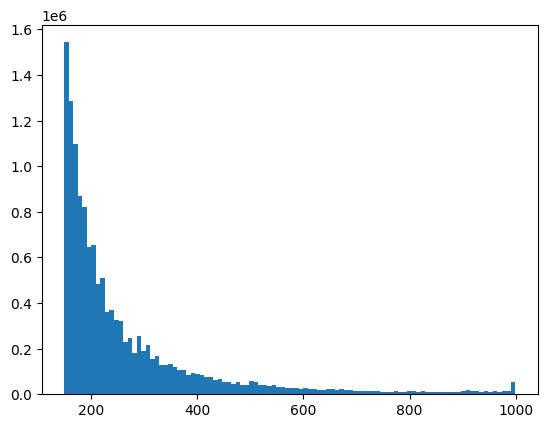

In [4]:
plt.hist(ppi_dat.combined_score, bins=100)

In [5]:
ppi_dat_500 = ppi_dat[ppi_dat.combined_score > 500]

In [6]:
ppi_dat_500.to_csv('/Users/cgu3/Documents/data/protein_interaction_500', index_label=False)

In [32]:
dat_raw = pd.read_table('/Users/cgu3/Documents/Grape-Pi/graphgym/data/human-ORBI/raw/additional/marcottelab.org_MSpresso_roc_and_scores_MAIN_PAPER_human_orbi_self-1vs9inj-bin900_no-tm_human_orbi_self-1vs9inj-bin900_no-tm_score_id.txt', delimiter=' ',
                        names=['ID', 'score', 'score1', 'score2', 'mRNA', 'score3', 'label'])

In [35]:
pd.value_counts(dat_raw.label)

label
TN    8998
TP     786
Name: count, dtype: int64